<a href="https://colab.research.google.com/github/AbdulrahmanAhmed123/social_media/blob/main/social_media.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [ ]:
df=pd.read_csv('social_media_data.csv',)
df['date']
# df.describe()
# df.shape
# df.columns

,date,platform,post_type,likes,shares,comments,views
0,2023-05-24,Twitter,image,868.0,238.0,352.0,8836.0
1,2023-02-23,Twitter,image,944.0,610.0,146.0,5554.0
2,2023-03-18,Instagram,image,1067.0,858.0,365.0,4018.0
3,2023-06-12,Twitter,text,780.0,427.0,100.0,6999.0
4,2023-02-03,Instagram,text,836.0,893.0,443.0,5802.0
...,...,...,...,...,...,...,...
1995,2023-01-15,Facebook,video,2039.0,523.0,371.0,4780.0
1996,2022-11-13,Twitter,image,1652.0,891.0,410.0,8741.0
1997,2023-09-18,Twitter,video,528.0,207.0,341.0,6588.0
1998,2023-04-23,Facebook,video,1288.0,893.0,328.0,8349.0


In [ ]:
def detect_outliers(data, threshold=3):
  """
  This function detects outliers in a dataset using z-scores.

  Args:
      data: A list or NumPy array containing the data.
      threshold: The number of standard deviations away from the mean
                 to consider a point an outlier (default=3).

  Returns:
      A list of outliers identified in the data.
  """

  mean = np.mean(data)
  std = np.std(data)
  z_scores = (data - mean) / std
  outliers = [data[i] for i, score in enumerate(z_scores) if abs(score) > threshold]
  return outliers

# Example usage
  # Sample data with an outlier
outliers = detect_outliers(df['views'])

print("Outliers:", outliers)


Outliers: []


In [ ]:
# def detectt_outliers(data, ):
#   Q1 = data.quantile(0.25)
#   Q3 = data.quantile(0.75)
#   IQR = Q3 - Q1

#   # Calculate upper and lower bounds
#   upper_bound = Q3 + 1.5 * IQR
#   lower_bound = Q1 - 1.5 * IQR

#   # Identify outliers (data points outside the bounds)
#   outliers = data[(data > upper_bound) | (data < lower_bound)]
#   return outliers
# outliers = detectt_outliers(df['views','shares','comments'])
# print("Outliers:", outliers)

def detect_outliers_iqr(df, columns):
  """
  This function detects outliers in a DataFrame using the Interquartile Range (IQR) method for numerical columns.

  Args:
      df (pandas.DataFrame): The DataFrame containing the data.
      columns (list): A list of column names to check for outliers.

  Returns:
      pandas.DataFrame: A new DataFrame containing columns with outliers identified by IQR.
  """

  outliers_dict = {}
  for col in columns:
    # Check if column is numeric before proceeding
    if not pd.api.types.is_numeric_dtype(df[col]):
      print(f"Warning: Column '{col}' is not numerical. Skipping outlier detection.")
      continue

    try:
      # Calculate IQR and bounds
      Q1 = df[col].quantile(0.25)
      Q3 = df[col].quantile(0.75)
      IQR = Q3 - Q1
      upper_bound = Q3 + 1.5 * IQR
      lower_bound = Q1 - 1.5 * IQR

      # Identify outliers based on IQR bounds
      outliers = df[col][(df[col] > upper_bound) | (df[col] < lower_bound)]
      outliers_dict[col] = outliers
    except KeyError as e:
      print(f"Error: Column '{col}' not found in DataFrame. Skipping outlier detection.")

  return pd.DataFrame(outliers_dict)
outliers = detect_outliers_iqr(df.copy(),['views','shares','comments'])
print(outliers)

Empty DataFrame
Columns: [views, shares, comments]
Index: []


In [ ]:
df.describe()
df.shape

(2000, 7)

In [ ]:
df.isnull().sum()

date          0
platform      0
post_type     0
likes         8
shares        8
comments      8
views        10
dtype: int64

In [ ]:
df.shape
print(f"Original DataFrame shape: {df.shape}")
df = df.fillna(method='ffill')


print(f"Original DataFrame shape: {df.shape}")

df.isnull().sum()

Original DataFrame shape: (2000, 7)
Original DataFrame shape: (2000, 7)


date         0
platform     0
post_type    0
likes        0
shares       0
comments     0
views        0
dtype: int64

In [ ]:
df.dtypes

date          object
platform      object
post_type     object
likes        float64
shares       float64
comments     float64
views        float64
dtype: object

In [ ]:
df[['likes', 'shares', 'comments', 'views']].describe()

,likes,shares,comments,views
count,2000.000000,2000.000000,2000.000000,2000.000000
mean,1288.889500,497.433000,305.811500,6964.761500
std,525.451515,229.695807,114.754326,1724.791726
min,400.000000,100.000000,100.000000,4000.000000
25%,818.750000,300.000000,206.000000,5504.500000
50%,1292.000000,491.000000,310.000000,6946.000000
75%,1751.500000,688.000000,407.000000,8396.750000
max,2200.000000,900.000000,500.000000,9998.000000


In [ ]:
df.info()
df.isnull().sum()
df=df.fillna(method='ffill')
df.info()
print('# duplicated in data',df.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       2000 non-null   object 
 1   platform   2000 non-null   object 
 2   post_type  2000 non-null   object 
 3   likes      2000 non-null   float64
 4   shares     2000 non-null   float64
 5   comments   2000 non-null   float64
 6   views      2000 non-null   float64
dtypes: float64(4), object(3)
memory usage: 109.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       2000 non-null   object 
 1   platform   2000 non-null   object 
 2   post_type  2000 non-null   object 
 3   likes      2000 non-null   float64
 4   shares     2000 non-null   float64
 5   comments   2000 non-null   float64
 6   views      2000 non-null   float64
dtypes: float6

In [ ]:
df.columns
sns.boxplot(df['likes'])

plt.figure(figsize=(20,10))
sns.countplot(data=df, x='platform', hue='comments', palette="Set3")
plt.show()

sns.countplot(data=df, x='platform', hue='likes', palette="Set2")
plt.show()



In [ ]:
sns.heatmap(df[['likes','shares','comments','views']].corr(),annot=True,cmap='rainbow')

In [ ]:
df.columns

Index(['date', 'platform', 'post_type', 'likes', 'shares', 'comments',
       'views'],
      dtype='object')

In [ ]:
df.columns

Index(['date', 'platform', 'post_type', 'likes', 'shares', 'comments',
       'views'],
      dtype='object')

In [ ]:
platform_groups = df.groupby('platform')
print(platform_groups)
engagement_metrics = ['likes', 'shares', 'comments']
for metric in engagement_metrics:
    for platform, group_data in platform_groups:

      # Do something with each group data (e.g., calculate average engagement metrics)
      print(f"Platform: {platform}")
      print(f"ppdata{metric}: {group_data[metric]}")  # T

Platform: Facebook
ppdatalikes: 5       2019.0
11      1795.0
16      1672.0
22       515.0
27      1168.0
         ...  
1985    1491.0
1989     419.0
1994    1353.0
1995    2039.0
1998    1288.0
Name: likes, Length: 631, dtype: float64
Platform: Instagram
ppdatalikes: 2       1067.0
4        836.0
6       2163.0
12      1389.0
17       807.0
         ...  
1975     898.0
1977    1184.0
1978    1738.0
1986    1869.0
1992     412.0
Name: likes, Length: 678, dtype: float64
Platform: NonExistingPlatform
ppdatalikes: 294     1311.0
302      596.0
1153     407.0
1493    1434.0
1761    1876.0
1905    1277.0
Name: likes, dtype: float64
Platform: Twitter
ppdatalikes: 0        868.0
1        944.0
3        780.0
7        912.0
8       1746.0
         ...  
1991    1967.0
1993    1387.0
1996    1652.0
1997     528.0
1999     835.0
Name: likes, Length: 685, dtype: float64
Platform: Facebook
ppdatashares: 5       763.0
11      754.0
16      419.0
22      433.0
27      512.0
        ...  
1985    

In [ ]:
df['platform'].unique()

array(['Twitter', 'Instagram', 'Facebook', 'NonExistingPlatform'],
      dtype=object)

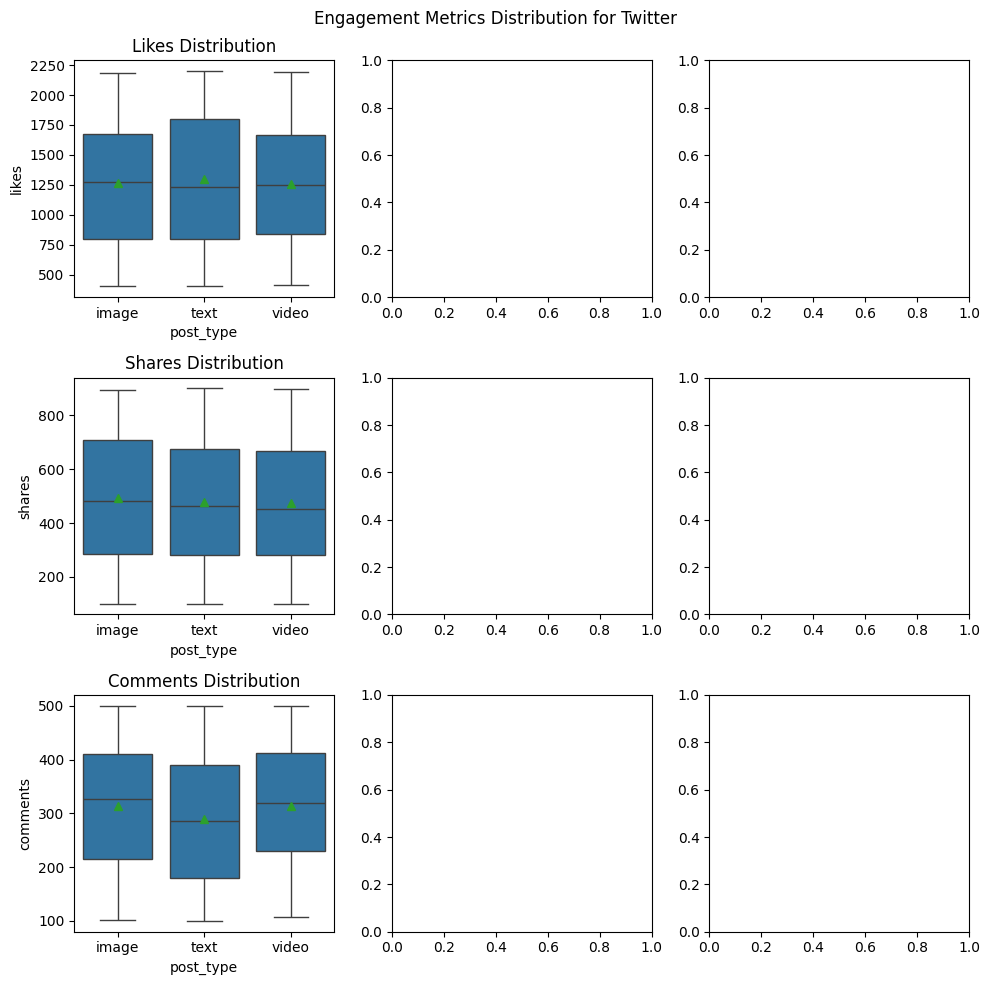

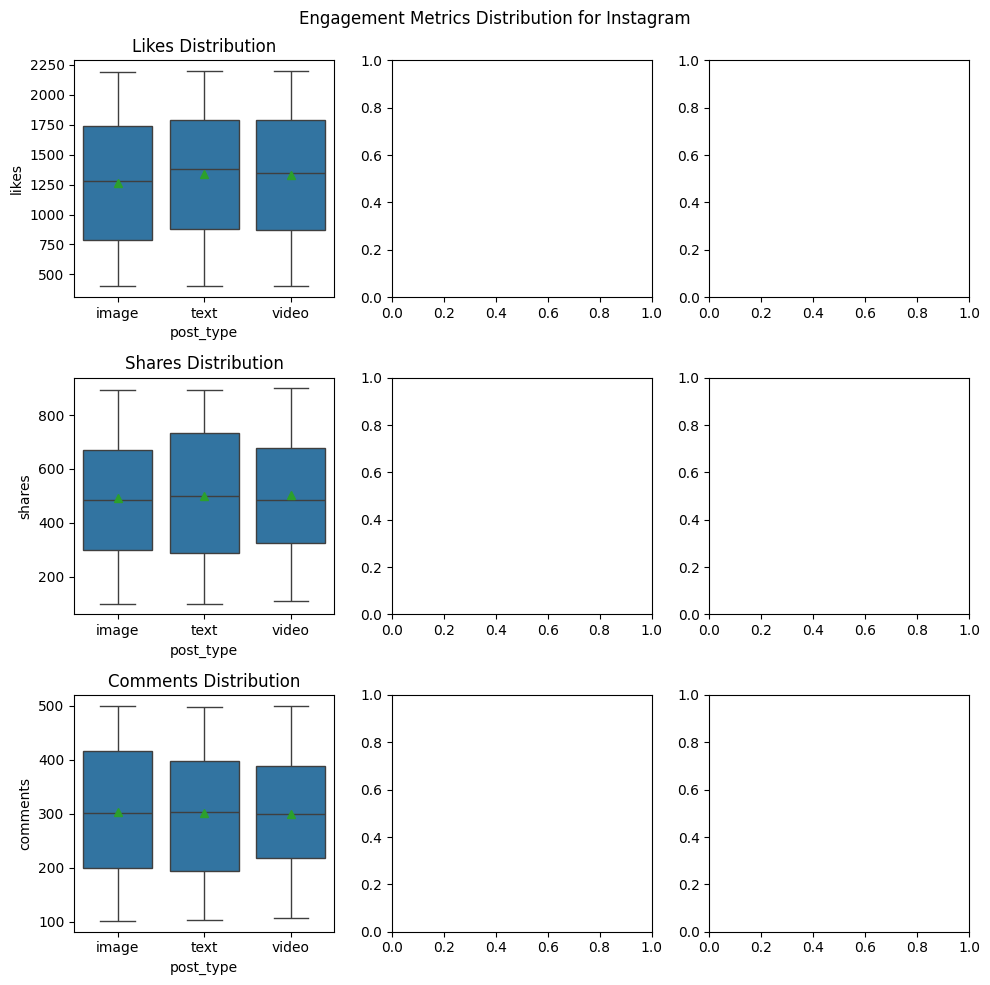

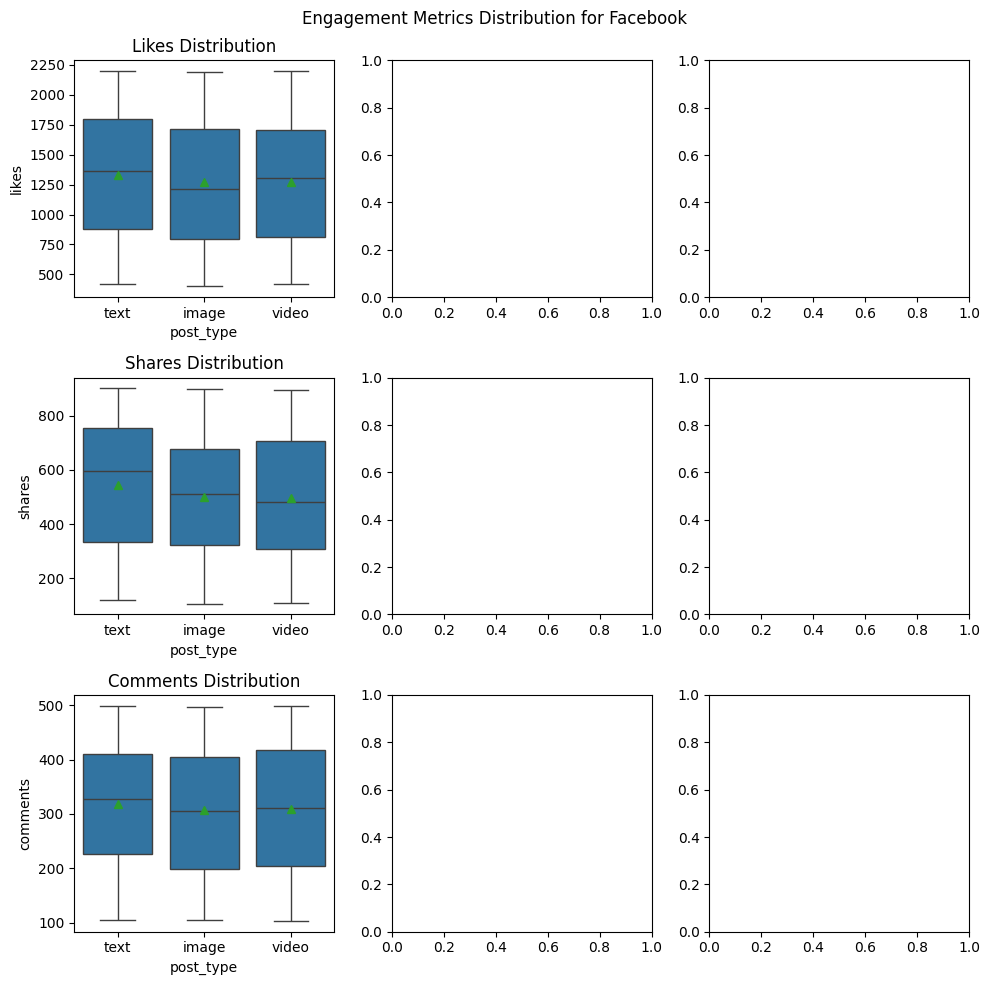

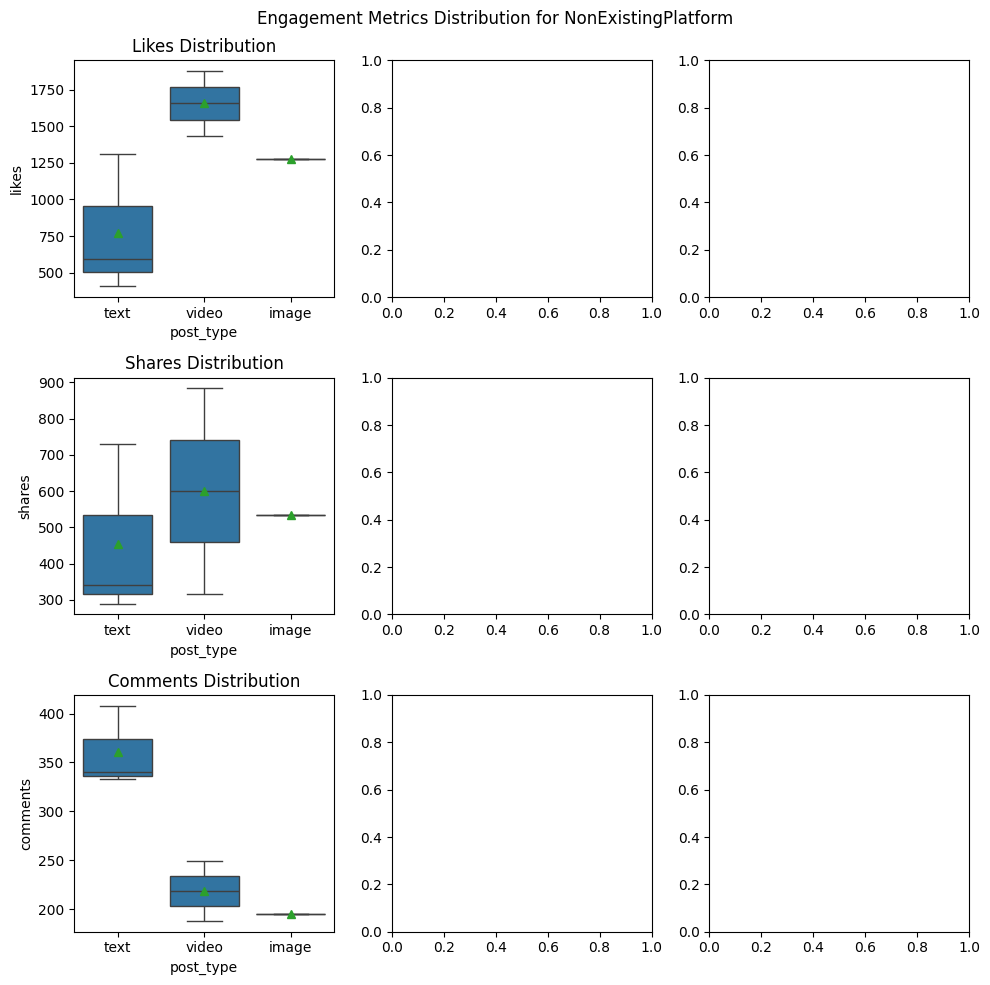

In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have pandas and matplotlib imported

# Choose the platform you want to analyze (replace with your desired platform)
chosen_platform = ['Twitter', 'Instagram', 'Facebook', 'NonExistingPlatform']  # Example platform
for platformchoice in chosen_platform:
  # Group data by platform
  platform_group = df[df['platform'] == platformchoice]  # Filter data for the chosen platform

  # Create a figure for subplots (adjust rows and cols as needed)
  fig, axes = plt.subplots(3, 3, figsize=(10, 10))  # 2 rows, 2 columns

  # Engagement metrics
  engagement_metrics = ['likes', 'shares', 'comments']
  row = 0
  col = 0

  for metric in engagement_metrics:
      # Create boxplots for each metric
      sns.boxplot(
          x="post_type",
          y=metric,
          showmeans=True,
          data=platform_group,
          ax=axes[row,col]
      )
      axes[row,col].set_title(f"{metric.capitalize()} Distribution")  # Subplot title
      row += 1  # Move to the next column

  # Customize the plot (optional)
  fig.suptitle(f"Engagement Metrics Distribution for {platformchoice}")  # Overall title
  plt.tight_layout()  # Adjust spacing
  plt.show()


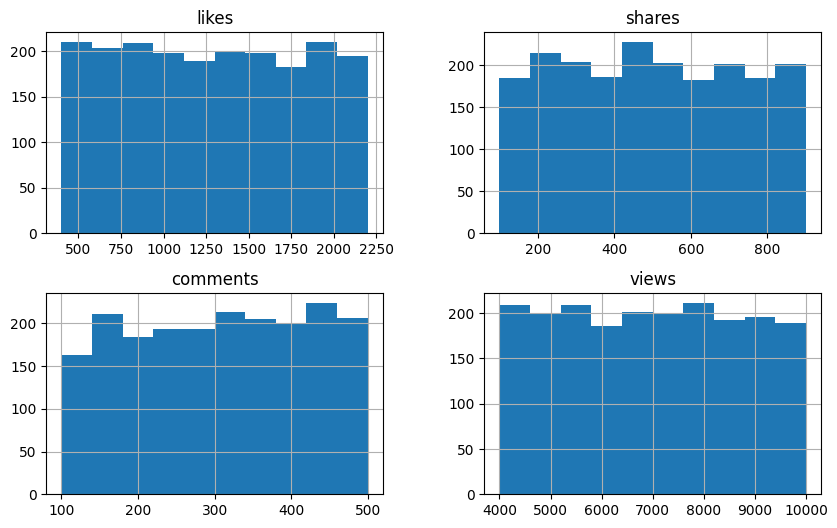

platform
Twitter                685
Instagram              678
Facebook               631
NonExistingPlatform      6
Name: count, dtype: int64
             likes    shares  comments     views
likes     1.000000  0.004851 -0.005116  0.001302
shares    0.004851  1.000000 -0.007652  0.011786
comments -0.005116 -0.007652  1.000000  0.042236
views     0.001302  0.011786  0.042236  1.000000


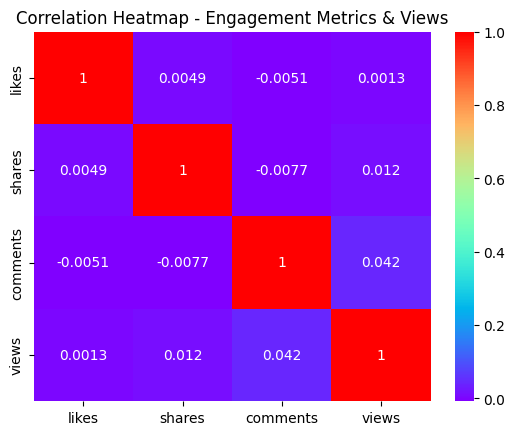

In [ ]:
# Distribution of engagement metrics
df.hist(figsize=(10, 6))  # Creates histograms for each engagement metric
plt.show()

# Value counts for categorical data
print(df['platform'].value_counts())  # Shows the count of posts per platform

# Correlation matrix
correlation = df[['likes', 'shares', 'comments', 'views']].corr(method='pearson')
print(correlation)  # Shows
sns.heatmap(correlation, annot=True,cmap='rainbow')  # Annotate with correlation values
plt.title("Correlation Heatmap - Engagement Metrics & Views")
plt.show()


In [ ]:
from datetime import datetime
# Extract the year from the date column and convert it to datetime format
df['year'] = pd.to_datetime(df['date'], format='%Y-%m-%d').dt.year
df['year'].unique()
# Create a 'year' column from the 'date' column with format '%Y-%m-%d'
df['year'] = pd.to_datetime(df['date'], format='%Y-%m-%d').dt.year

# Get unique years (optional, can be used later)
unique_years = df['year'].unique()

# Calculate totals for each year (assuming video post_type is 'video')
year_totals = df[df['post_type'] == 'video'].groupby('year')[
    ['likes', 'shares', 'comments', 'views']].sum()

# Print the results in a formatted table (optional)
print("Year-wise Total Engagement Metrics (Videos):")
print(year_totals.to_string())



Year-wise Total Engagement Metrics (Videos):
         likes    shares  comments      views
year                                         
2022  180851.0   75537.0   44278.0  1017825.0
2023  635319.0  235503.0  149861.0  3446906.0


In [ ]:
import pandas as pd

# Assuming you have your DataFrame (df) with columns 'platform', 'likes', 'shares', 'comments'

# Calculate total engagement per platform (likes + shares + comments)
df['engagement'] = df[['likes', 'shares', 'comments']].sum(axis=1)

# Group by platform and get the platform with the highest average engagement
highest_engagement_platform = df.groupby('platform')['engagement'].median().idxmax()

# Calculate the average engagement for the platform with the highest engagement
highest_engagement_value = df[df['platform'] == highest_engagement_platform]['engagement'].mean()
# # Print the results
print(f"Platform with Highest Overall Engagement: {highest_engagement_platform}")
print(f"Average Engagement on {highest_engagement_platform}: {highest_engagement_value:.2f}")

Platform with Highest Overall Engagement: Facebook
Average Engagement on Facebook: 2101.94


In [ ]:
import pandas as pd

# Assuming you have your DataFrame (df) with columns 'platform', 'likes', 'shares', 'comments', 'views'

# Calculate the number of posts per platform
posts_per_platform = df.groupby('platform').size()

# Calculate average engagement metrics (assuming these columns exist)
average_likes = df.groupby('platform')['likes'].mean()
average_shares = df.groupby('platform')['shares'].mean()
average_comments = df.groupby('platform')['comments'].mean()
average_views = df.groupby('platform')['views'].mean()
average_likes
# Combine results into a DataFrame (optional)
engagement_averages = pd.DataFrame({
    'Platform': posts_per_platform.index,
    'Posts': posts_per_platform.values,
    'Avg Likes': average_likes.values,
    'Avg Shares': average_shares.values,
    'Avg Comments': average_comments.values,
    'Avg Views': average_views.values
})

# Print the results (you can choose to print the DataFrame or individual averages)
print(engagement_averages.to_string())  # Prints DataFrame with all metrics

# Or print individual averages
# print(f"Average Likes per Post (by Platform):")
# print(average_likes.to_string())
# ... (similarly print for other metrics)


              Platform  Posts    Avg Likes  Avg Shares  Avg Comments    Avg Views
0             Facebook    631  1289.982428  513.141494    311.160317  6984.239234
1            Instagram    678  1305.837278  497.372404    301.046062  6905.875556
2  NonExistingPlatform      6  1150.166667  515.833333    285.500000  6729.166667
3              Twitter    685  1274.994152  482.437775    305.857980  7013.258065


In [ ]:
# Create a crosstab to get counts of each post type by platform
post_type_counts = pd.crosstab(df['platform'], df['post_type'])

# Print the crosstab (consider formatting for readability)
print(post_type_counts.to_string())


post_type            image  text  video
platform                               
Facebook               218   204    209
Instagram              267   203    208
NonExistingPlatform      1     3      2
Twitter                249   219    217


In [ ]:
import pandas as pd

# Assuming you have your DataFrame (df) with columns 'post_type', 'likes', 'shares', 'comments'

# Calculate total engagement per post type (likes + shares + comments)
df['engagement'] = df[['likes', 'shares', 'comments']].sum(axis=1)

# Group by post_type and calculate average engagement
average_engagement_by_type = df.groupby('post_type')['engagement'].median()

# Find the post type with the highest average engagement
highest_engagement_type = average_engagement_by_type.idxmax()
highest_engagement_value = average_engagement_by_type.max()

# Print the results
print(f"Post Type with Highest Average Engagement: {highest_engagement_type}")
print(f"Average Engagement for {highest_engagement_type}: {highest_engagement_value:.2f}")


Post Type with Highest Average Engagement: text
Average Engagement for text: 2100.00


array(['image', 'text', 'video'], dtype=object)

In [ ]:
df['year_quarter'] = df['date'].dt.to_period('Q')  # Combine year and quarter

# Calculate total engagement per year-quarter
total_engagement_by_year_quarter = df.groupby('year_quarter')[['likes', 'shares', 'comments']].sum()

# Print results
print(total_engagement_by_year_quarter.to_string())


                 likes    shares  comments
year_quarter                              
2022Q4        573570.0  235393.0  137125.0
2023Q1        629848.0  247688.0  156772.0
2023Q2        630151.0  228698.0  144422.0
2023Q3        615311.0  234753.0  142869.0
2023Q4        120392.0   44063.0   28061.0
